In [1]:
import pbjam as pb
import pickle

In [2]:
pickle_in = open("pb.pickle","rb")
edict = pickle.load(pickle_in)

In [3]:
pbag = pb.peakbag(edict['f'], edict['p'], edict['a'])

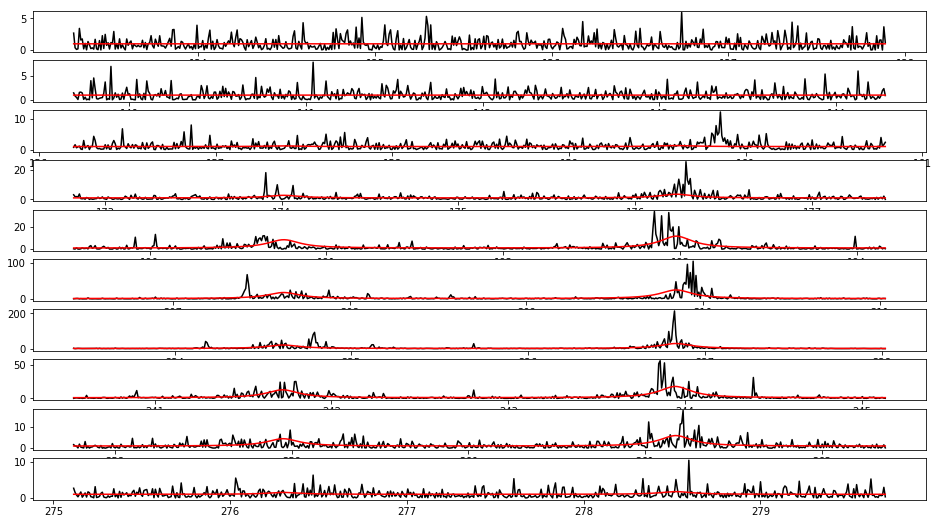

In [4]:
pbag.plot_start_model();

In [5]:
pbag.sample(model_type='simple', cores=4, tune=1500, advi=False)

/home/grd/.local/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:22<00:00, 96.73draws/s] 
The acceptance probability does not match the target. It is 0.6963524529130304, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


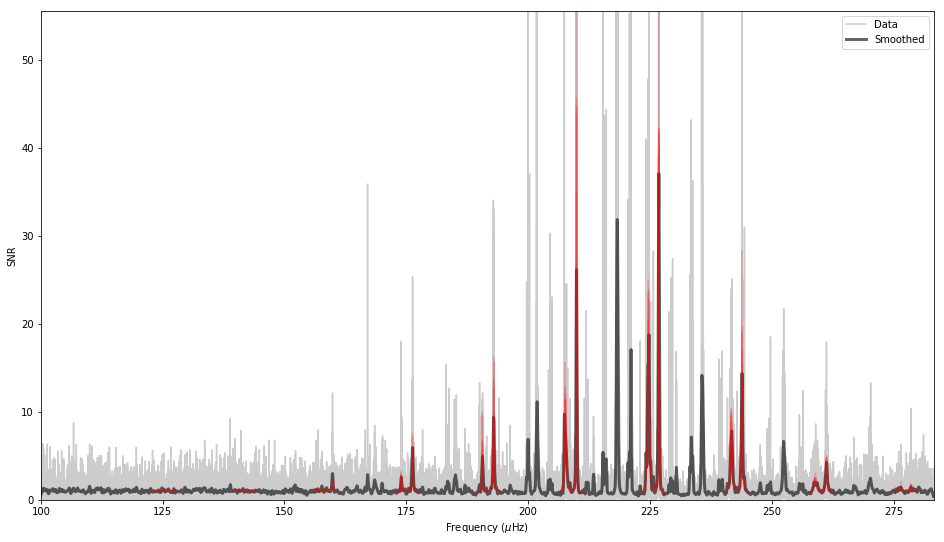

In [6]:
pbag.plot_flat_fit(thin=100);

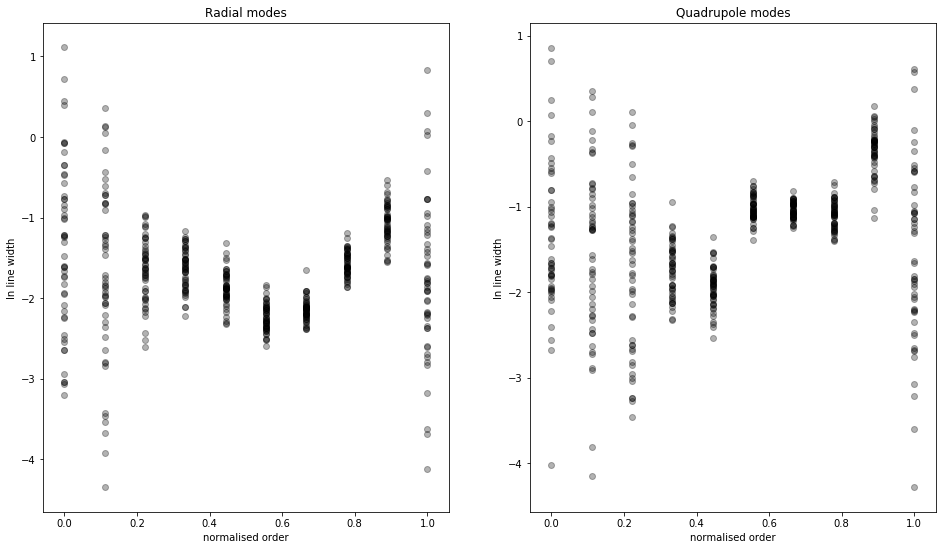

In [7]:
pbag.plot_linewidth();

In [8]:
pbag.sample(model_type='model_gp', cores=4, tune=1500, advi=False)

/home/grd/Software/PBjam/pbjam/peakbag.py:289: UserWarning: This model is developmental - use carefully
  warnings.warn('This model is developmental - use carefully')
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
/home/grd/.local/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/grd/.local/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/grd/.loc

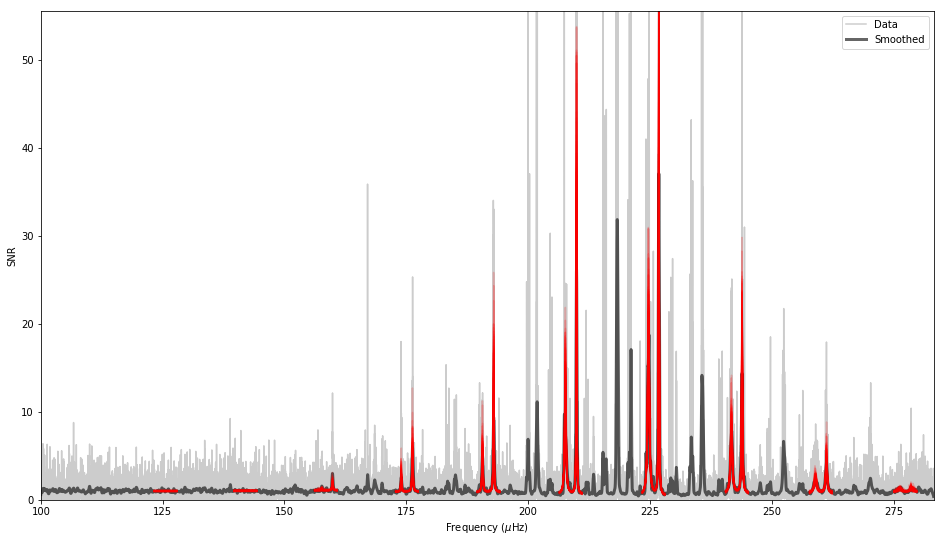

In [9]:
pbag.plot_flat_fit(thin=10);

100%|██████████| 1000/1000 [00:34<00:00, 29.20it/s]


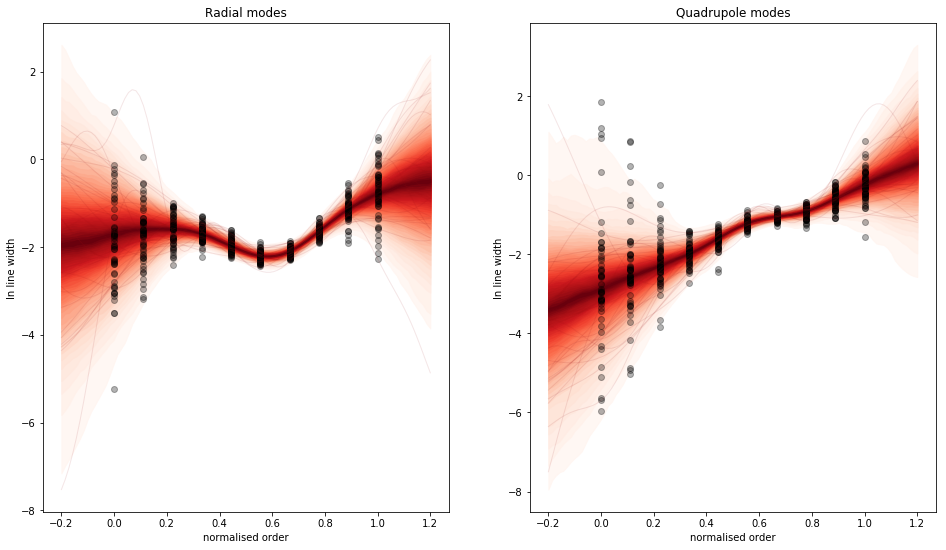

In [10]:
pbag.plot_linewidth();

In [11]:
import pymc3 as pm
pm.summary(pbag.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
l0__0,126.702413,0.495256,0.008690,125.678904,127.638754,3582.823764,0.999333
l0__1,143.114213,0.508087,0.010607,142.145710,144.085227,1961.481985,1.001347
l0__2,159.844934,0.031650,0.000848,159.783482,159.903677,1498.837538,1.000380
l0__3,176.265124,0.017342,0.000340,176.231744,176.298440,2616.585237,1.001263
l0__4,192.921630,0.013641,0.000258,192.892748,192.946794,3771.849814,0.999600
l0__5,209.925036,0.009446,0.000253,209.907277,209.944490,816.447213,1.003089
l0__6,226.813081,0.009655,0.000173,226.794427,226.831381,3568.569002,0.999641
l0__7,243.889433,0.016617,0.000376,243.860019,243.922704,1881.926068,0.999538
l0__8,261.210489,0.029152,0.000549,261.155337,261.271636,3204.356248,0.999924
l0__9,278.726821,0.248180,0.008927,278.383640,279.257101,664.269218,1.002596
